In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
gtex=pd.read_csv('../data/gtex_tpm_median.csv.gz',index_col=0)
gtex.shape

(54, 49422)

In [4]:
ips=pd.read_csv('../data/ips_tpm.gz',index_col=0)
ips.shape

(330, 35049)

In [5]:
df=pd.concat([gtex.mean(),ips.median()],axis=1)
df.columns=['non','ips']
df=df.dropna()

In [6]:
df=df[~df.index.str.startswith('MT')]
df=df[~df.index.str.startswith('RP')]

In [7]:
tf=pd.read_csv('http://humantfs.ccbr.utoronto.ca/download/v_1.01/TF_names_v_1.01.txt',header=None)[0].values
len(tf)

1639

In [93]:
df=df.loc[df.index.intersection(tf)].drop('ZNF90')

In [94]:
df['ips/non']=(df.ips+1)/(df.non+1)

In [95]:
topi=df.sort_values('ips/non').tail(20)
topi

,non,ips,ips/non
SOX11,0.361332,27.675,21.063936
NR6A1,2.662632,78.955,21.829930
HMGA1,71.529864,1649.030,22.749664
MYCN,1.403588,54.825,23.225695
ETV4,2.473795,79.705,23.232516
ZNF93,1.242721,60.690,27.506759
PRDM14,0.016939,28.460,28.969292
ZIC3,1.221574,65.760,30.050767
ZNF730,0.233963,38.130,31.710831
TERF1,15.321696,630.370,38.682868


In [96]:
top=ips[topi.index]
top.head()

,SOX11,NR6A1,HMGA1,MYCN,ETV4,ZNF93,PRDM14,ZIC3,ZNF730,TERF1,OTX2,FOXH1,SALL4,NANOG,LIN28B,HES3,HMGA2,ZFP42,ZSCAN10,LIN28A
HPSI1213i-xuja_2,18.25,121.60,1472.39,40.83,127.80,6.55,9.11,25.89,29.39,372.52,12.41,33.59,50.82,29.70,59.59,11.90,116.87,1.45,124.57,604.83
HPSI0614i-voce_2,38.46,46.59,1512.42,42.43,160.50,62.64,34.90,74.20,39.74,548.07,23.39,103.33,61.61,294.24,98.49,87.72,101.83,120.50,124.65,719.11
HPSI0814i-doao_2,18.77,125.40,1560.67,63.13,94.98,46.75,8.18,47.42,14.00,324.28,71.03,45.55,59.89,50.72,51.61,48.33,111.52,19.19,149.76,582.86
HPSI0314i-sojd_3,26.91,63.96,1796.48,56.77,162.83,45.67,39.83,51.24,18.90,497.83,22.17,70.62,50.65,158.80,59.97,115.94,124.68,96.13,162.28,603.57
HPSI0114i-lexy_2,15.77,73.23,1840.20,66.68,98.88,43.36,39.70,62.78,20.22,494.42,73.53,38.39,66.87,112.58,62.68,35.43,101.78,136.03,178.80,623.28


In [97]:
top=top[top.median().sort_values(ascending=False).index]

[None]

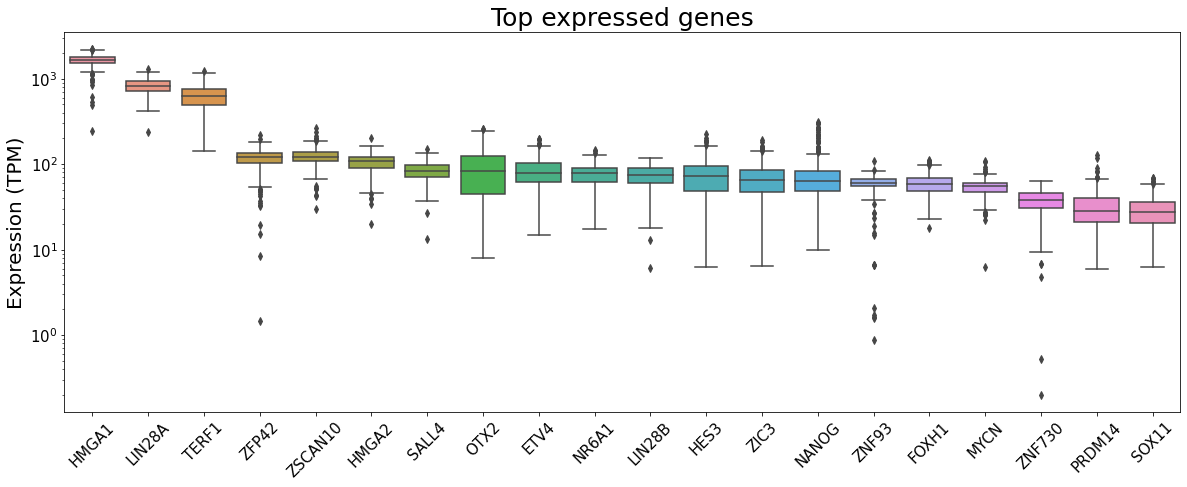

In [98]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
#b=sns.lineplot(data=test,linewidth=2,ax=ax)
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")

In [99]:
test=ips.head(1)[top.median().sort_values(ascending=False).index].T

[None]

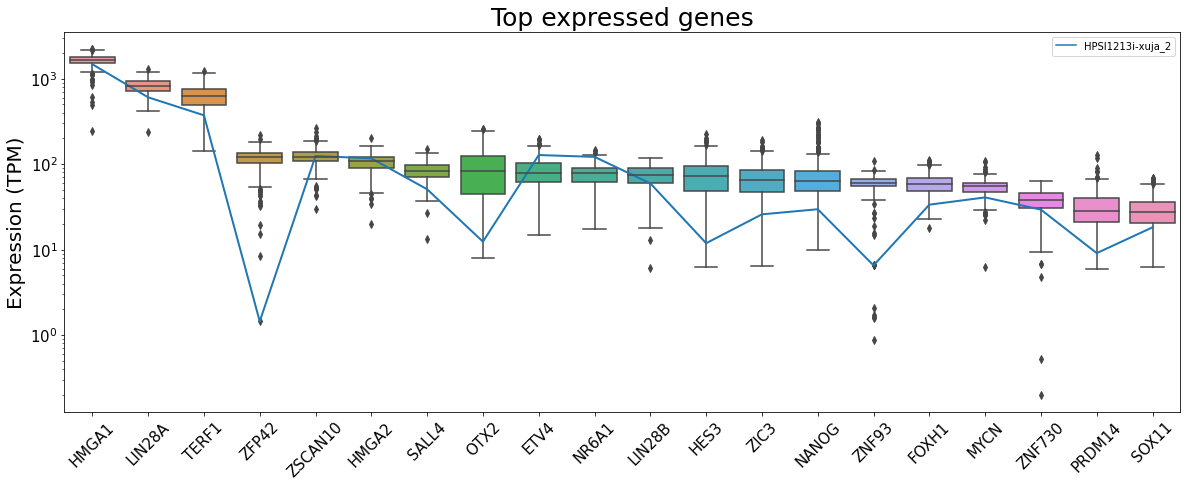

In [100]:
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
b=sns.lineplot(data=test,linewidth=2,ax=ax);
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")

In [101]:
layout = go.Layout({"title": "Top expressed genes in iPSC",
                       "yaxis": {"title":"Expression (TPM)"},
                       "showlegend": False})
fig = go.Figure(layout=layout)

for i in range(20):
    fig.add_trace(
        go.Box(
            y=top.iloc[:,i],
            name=top.columns[i]
        ))
fig.add_trace(
    go.Line(
        y=top.head(1).T['HPSI1213i-xuja_2'],
        x=top.columns
    ))     
fig.update_yaxes(type="log")

fig.show()

/Users/mahdi/opt/anaconda3/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




[None]

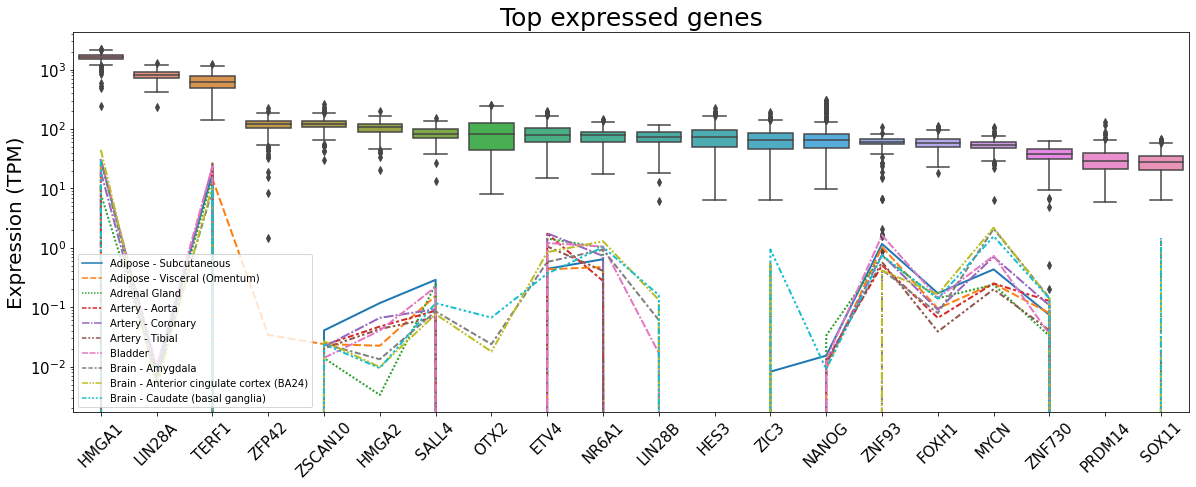

In [102]:
test=gtex.head(10)[top.median().sort_values(ascending=False).index].T
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(rotation=45);
b=sns.boxplot(data=top,ax=ax);
b=sns.lineplot(data=test,linewidth=2,ax=ax)
b.axes.set_title("Top expressed genes",fontsize=25)
b.set_ylabel("Expression (TPM)",fontsize=20)
b.set_xlabel('',fontsize=0)
b.tick_params(labelsize=15)
ax.set(yscale="log")

In [103]:
top.reset_index(drop=True).to_csv('../app/data/top20tf.csv')
top

,HMGA1,LIN28A,TERF1,ZFP42,ZSCAN10,HMGA2,SALL4,OTX2,ETV4,NR6A1,LIN28B,HES3,ZIC3,NANOG,ZNF93,FOXH1,MYCN,ZNF730,PRDM14,SOX11
HPSI1213i-xuja_2,1472.39,604.83,372.52,1.45,124.57,116.87,50.82,12.41,127.80,121.60,59.59,11.90,25.89,29.70,6.55,33.59,40.83,29.39,9.11,18.25
HPSI0614i-voce_2,1512.42,719.11,548.07,120.50,124.65,101.83,61.61,23.39,160.50,46.59,98.49,87.72,74.20,294.24,62.64,103.33,42.43,39.74,34.90,38.46
HPSI0814i-doao_2,1560.67,582.86,324.28,19.19,149.76,111.52,59.89,71.03,94.98,125.40,51.61,48.33,47.42,50.72,46.75,45.55,63.13,14.00,8.18,18.77
HPSI0314i-sojd_3,1796.48,603.57,497.83,96.13,162.28,124.68,50.65,22.17,162.83,63.96,59.97,115.94,51.24,158.80,45.67,70.62,56.77,18.90,39.83,26.91
HPSI0114i-lexy_2,1840.20,623.28,494.42,136.03,178.80,101.78,66.87,73.53,98.88,73.23,62.68,35.43,62.78,112.58,43.36,38.39,66.68,20.22,39.70,15.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HPSI0214i-datg_2,2124.09,840.94,316.87,109.02,121.67,75.76,71.93,60.53,123.83,76.31,53.09,102.16,67.39,105.85,60.52,73.98,51.04,23.34,21.43,20.31
HPSI0114i-kolf_3,1828.46,747.89,480.24,124.37,156.61,85.50,75.51,81.23,88.94,58.58,60.83,98.68,58.29,50.78,59.60,71.65,56.91,35.26,28.42,23.36
HPSI0115i-vazt_2,1638.83,1023.11,896.59,143.60,111.41,121.28,113.35,182.83,46.22,80.86,105.13,112.16,108.91,39.27,66.78,63.77,56.40,49.59,48.65,48.69
HPSI0114i-iisa_1,2100.75,727.04,574.64,149.05,195.30,111.11,69.75,64.13,115.83,92.19,59.13,47.51,28.92,74.90,50.86,54.86,51.64,30.18,24.20,20.62


In [104]:
ens=pd.read_table('../app/data/mart_export.txt',index_col=2)
ens=ens.loc[top.columns][['Gene stable ID']].drop_duplicates()
len(ens)

20

In [105]:
ens.to_csv('../app/data/top20tf_ens.csv')

In [106]:
top

,HMGA1,LIN28A,TERF1,ZFP42,ZSCAN10,HMGA2,SALL4,OTX2,ETV4,NR6A1,LIN28B,HES3,ZIC3,NANOG,ZNF93,FOXH1,MYCN,ZNF730,PRDM14,SOX11
HPSI1213i-xuja_2,1472.39,604.83,372.52,1.45,124.57,116.87,50.82,12.41,127.80,121.60,59.59,11.90,25.89,29.70,6.55,33.59,40.83,29.39,9.11,18.25
HPSI0614i-voce_2,1512.42,719.11,548.07,120.50,124.65,101.83,61.61,23.39,160.50,46.59,98.49,87.72,74.20,294.24,62.64,103.33,42.43,39.74,34.90,38.46
HPSI0814i-doao_2,1560.67,582.86,324.28,19.19,149.76,111.52,59.89,71.03,94.98,125.40,51.61,48.33,47.42,50.72,46.75,45.55,63.13,14.00,8.18,18.77
HPSI0314i-sojd_3,1796.48,603.57,497.83,96.13,162.28,124.68,50.65,22.17,162.83,63.96,59.97,115.94,51.24,158.80,45.67,70.62,56.77,18.90,39.83,26.91
HPSI0114i-lexy_2,1840.20,623.28,494.42,136.03,178.80,101.78,66.87,73.53,98.88,73.23,62.68,35.43,62.78,112.58,43.36,38.39,66.68,20.22,39.70,15.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HPSI0214i-datg_2,2124.09,840.94,316.87,109.02,121.67,75.76,71.93,60.53,123.83,76.31,53.09,102.16,67.39,105.85,60.52,73.98,51.04,23.34,21.43,20.31
HPSI0114i-kolf_3,1828.46,747.89,480.24,124.37,156.61,85.50,75.51,81.23,88.94,58.58,60.83,98.68,58.29,50.78,59.60,71.65,56.91,35.26,28.42,23.36
HPSI0115i-vazt_2,1638.83,1023.11,896.59,143.60,111.41,121.28,113.35,182.83,46.22,80.86,105.13,112.16,108.91,39.27,66.78,63.77,56.40,49.59,48.65,48.69
HPSI0114i-iisa_1,2100.75,727.04,574.64,149.05,195.30,111.11,69.75,64.13,115.83,92.19,59.13,47.51,28.92,74.90,50.86,54.86,51.64,30.18,24.20,20.62


In [109]:
df.sort_values('ips/non').tail(100).to_csv('../data/top10tfs.csv')